In [2]:
#!pip install flask

In [50]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import datetime
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import os

In [82]:
#Extract the list of used cars for sale from cars24.com website using Selenium and 
#Beautiful Soup

url = 'https://www.cars24.com/buy-used-car?year-range=2013-2021&sort=P&storeCityId=5732&pinId=600001'

In [146]:
#r = requests.get(url)
#print(r)


<Response [200]>


In [97]:
year = []
transmission = []

In [174]:
browser = webdriver.Safari()

# makes the browser wait if it can't find an element
browser.implicitly_wait(10)

browser.get(url)
browser.implicitly_wait(15)


In [172]:
#browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#browser.implicitly_wait(45)

In [176]:
#This piece of code will scroll to the end of the page first, this being a dynamic web page content
import time
SCROLL_PAUSE_TIME = 0.5

# Get scroll height
last_height = browser.execute_script("return document.body.scrollHeight")

while True:
    # Scroll down to bottom
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = browser.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [177]:
#Use beautiful soup to break down the details of the car using html attributes
soup = BeautifulSoup(browser.page_source)
cars1 = soup.find_all('div',attrs={'class':'_1l4fi'})
car_model = soup.find_all('div',attrs={'class':'_1jpRU'})
details = soup.find('ul',attrs={'class':'bVR0c'}).find_all('li')
details
print(len(car_model))

576


In [270]:
#cars1 = soup.find_all('div',attrs={'class':'_1l4fi'})
len(cars1)
print(car_model[0])

<div class="_1jpRU"><h2 class="_3FpCg">2020 Maruti Alto</h2><p class="cvakB">LXI <span>Manual</span></p></div>


In [306]:
year = []
transmission = []
model = []
km = []
engine = []
owner = [] 
make = []
carprice = []

In [307]:
#print(car_model)
#scroll through all the extracted car list to get the details
j = 0
for x in car_model:
    text1 = car_model[j].find('h2',attrs={'class':'_3FpCg'})
    text2 = car_model[j].find('p',attrs={'class':'cvakB'})
    trans = text2.find('span')
    #print(text2.text)
    #print(trans.text)
    desc = text1.text.split(' ')
    #print(desc)
    year.append(desc[0])
    text3 = ''
    text3 = text3.join(desc[1:])
    model.append(text3)
    make.append(text2.text)
    #print(model)
    transmission.append(trans.text)
    #desc.pop(0)
    #desc.pop(0)
    #desc.pop(-1)
    details = cars1[j].find('ul',attrs={'class':'bVR0c'}).find_all('li')
    price = cars1[j].find('div',attrs={'class':'_7udZZ'}).text
    carprice.append(price)
    km.append(details[0].text)
    owner.append(details[1].text)
    engine.append(details[2].text)

    #print(model)
    #print(km,engine,owner,year,transmission)
    j = j + 1
    #break

In [308]:

len(carprice)

576

In [309]:
len(model)

576

In [310]:
#Finally convert this extracted info into a pandas dataframe
dict1 = {'Model':model,'Make':make,'Transmission':transmission,'Engine':engine,'Year':year,'KM':km,'Price':carprice,'Owner':owner}
df = pd.DataFrame(dict1)
df

,Model,Make,Transmission,Engine,Year,KM,Price,Owner
0,MarutiAlto,LXI Manual,Manual,Petrol,2020,"3,494 km","₹4,19,599",1st Owner
1,MarutiEeco,5 STR WITH AC PLUSHTR Manual,Manual,Petrol,2014,"18,371 km","₹3,54,499",1st Owner
2,MarutiSwift,LXI Manual,Manual,Petrol,2019,"2,484 km","₹5,86,699",1st Owner
3,RenaultKwid,1.0 RXT Opt AT Automatic,Automatic,Petrol,2020,"4,824 km","₹4,83,299",1st Owner
4,MarutiSwiftDzire,VXI 1.2 BS IV Manual,Manual,Petrol,2014,"10,131 km","₹4,92,099",1st Owner
...,...,...,...,...,...,...,...,...
571,HyundaiGrandi10,MAGNA 1.2 KAPPA VTVT Manual,Manual,Petrol,2017,"14,965 km","₹4,91,899",1st Owner
572,HyundaiCreta,1.6 SX (O) VTVT Manual,Manual,Petrol,2018,"18,813 km","₹9,25,099",1st Owner
573,VolkswagenAmeo,COMFORTLINE 1.2 Manual,Manual,Petrol,2017,"48,014 km","₹4,61,199",1st Owner
574,MarutiVitaraBrezza,ZDI Manual,Manual,Diesel,2016,"62,482 km","₹6,77,999",1st Owner


In [311]:
#Copy to a CSV for later use
df.to_csv('cars24_used.csv')

In [149]:
#!pip install selenium

     |████████████████████████████████| 904 kB 9.4 MB/s eta 0:00:01


In [312]:
df.info()
#No null values present in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Model         576 non-null    object
 1   Make          576 non-null    object
 2   Transmission  576 non-null    object
 3   Engine        576 non-null    object
 4   Year          576 non-null    object
 5   KM            576 non-null    object
 6   Price         576 non-null    object
 7   Owner         576 non-null    object
dtypes: object(8)
memory usage: 36.1+ KB


In [313]:
#Convert price from string to numeric, remove commas and currency 
#Lets see the range of prices for a second hand car
import matplotlib.pyplot as plt
df['Price'] = df['Price'].str.replace('₹', '')
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'])


In [314]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

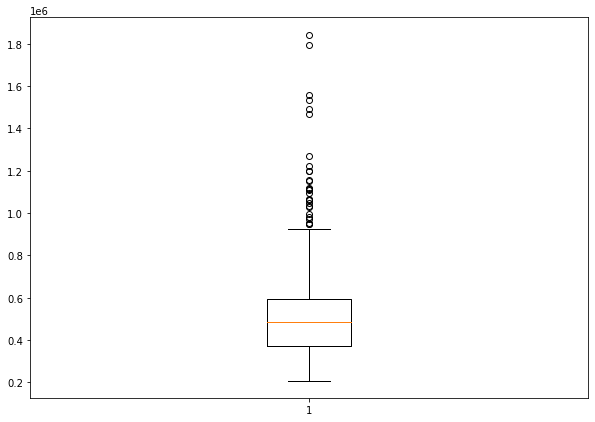

In [429]:
#maximum distribution of price range represented using box plot, lies below 600000
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['Price'])
plt.show()

In [428]:
#Just a check to get the list of second hand cars with a price exceeding 800000. Notice 
# that most of the cars are SUVs with very few sedans and hatchbacks in this price range
df[df['Price'] > 800000]

,Model,Make,Transmission,Engine,Year,KM,Price,Owner,CarAge,Segment
187,HondaCity,V MT PETROL Manual,2,1,2017,34425,814299,1st Owner,4,Sedan
232,JeepCompass,2.0 LONGITUDE (O) Manual,2,0,2018,14974,1559699,1st Owner,3,Compact SUV
250,HyundaiVerna,1.6 SX+ VTVT AT Automatic,1,1,2019,6260,1093199,2nd Owner,2,Sedan
256,HondaBR-V,1.5 i-VTEC V CVT Automatic,1,1,2017,38235,806199,3rd Owner,4,Compact SUV
258,HondaJazz,1.2 VX AT Automatic,1,1,2019,4355,949699,1st Owner,2,Hatchback
274,TataNEXON,XZA + 1.2 PETROL A/T Automatic,1,1,2018,26444,850599,1st Owner,3,Sub-Compact SUV
276,MarutiErtiga,VDI SHVS Manual,2,0,2017,37958,830799,1st Owner,4,Medium MPV
277,MarutiVitaraBrezza,ZDI AMT Automatic,1,0,2019,5647,1065399,1st Owner,2,Sub-Compact SUV
291,HyundaiVerna,1.6 SX VTVT Manual,2,1,2018,35859,979799,1st Owner,3,Sedan
293,MahindraXUV500,W6 AT Automatic,1,0,2016,27043,1059799,1st Owner,5,Mid SUV


In [318]:
from datetime import date
todays_date = date.today()
current_year = todays_date.year
current_year

2021

In [319]:
#Get the age of the car. 
df['CarAge'] = current_year - pd.to_numeric(df['Year'])

In [320]:
df.head()

,Model,Make,Transmission,Engine,Year,KM,Price,Owner,CarAge
0,MarutiAlto,LXI Manual,Manual,Petrol,2020,"3,494 km",419599,1st Owner,1
1,MarutiEeco,5 STR WITH AC PLUSHTR Manual,Manual,Petrol,2014,"18,371 km",354499,1st Owner,7
2,MarutiSwift,LXI Manual,Manual,Petrol,2019,"2,484 km",586699,1st Owner,2
3,RenaultKwid,1.0 RXT Opt AT Automatic,Automatic,Petrol,2020,"4,824 km",483299,1st Owner,1
4,MarutiSwiftDzire,VXI 1.2 BS IV Manual,Manual,Petrol,2014,"10,131 km",492099,1st Owner,7


In [321]:
#Convert KM from string to numeric
df['KM'] = df['KM'].str.replace('km', '')
df['KM'] = df['KM'].str.replace(',', '')
df['KM'] = pd.to_numeric(df['KM'])

In [322]:
df.head()

,Model,Make,Transmission,Engine,Year,KM,Price,Owner,CarAge
0,MarutiAlto,LXI Manual,Manual,Petrol,2020,3494,419599,1st Owner,1
1,MarutiEeco,5 STR WITH AC PLUSHTR Manual,Manual,Petrol,2014,18371,354499,1st Owner,7
2,MarutiSwift,LXI Manual,Manual,Petrol,2019,2484,586699,1st Owner,2
3,RenaultKwid,1.0 RXT Opt AT Automatic,Automatic,Petrol,2020,4824,483299,1st Owner,1
4,MarutiSwiftDzire,VXI 1.2 BS IV Manual,Manual,Petrol,2014,10131,492099,1st Owner,7


In [327]:
df.describe()

,KM,Price,CarAge
count,576.00000,576.00000,576.00000
mean,50513.76215,520509.06944,4.76736
std,38180.54681,217336.53632,1.90598
min,1193.00000,208899.00000,1.00000
25%,21659.50000,370524.00000,3.00000
50%,42791.00000,484449.00000,5.00000
75%,68689.00000,596324.00000,6.00000
max,276979.00000,1843499.00000,8.00000


In [326]:
#Get the list of unique car models. There are about 60 of them
df['Model'].unique()

array(['MarutiAlto', 'MarutiEeco', 'MarutiSwift', 'RenaultKwid',
       'MarutiSwiftDzire', 'MarutiAlto800', 'MarutiWagonR1.0',
       'HyundaiEon', 'TataTiago', 'MarutiAltoK10', 'MarutiOMNIE',
       'MarutiAStar', 'MarutiCelerio', 'MarutiDzire', 'Hyundaii20',
       'HyundaiGrandi10', 'FordEcosport', 'MarutiSPRESSO',
       'HyundaiElitei20', 'FordFigo', 'Hyundaii10', 'HondaBrio',
       'HyundaiNEWSANTRO', 'FordNewFigo', 'HondaJazz', 'HondaAmaze',
       'MarutiBaleno', 'VolkswagenPolo', 'MarutiIGNIS',
       'NissanMicraActive', 'MahindraTUV300', 'HondaCity', 'HondaMobilio',
       'MarutiCiaz', 'RenaultTRIBER', 'Hyundaii20Active', 'JeepCompass',
       'HyundaiVerna', 'FordFigoAspire', 'HondaBR-V', 'NissanMicra',
       'TataNEXON', 'MarutiErtiga', 'MarutiVitaraBrezza',
       'MahindraXUV500', 'VolkswagenVento', 'TataHexa', 'MarutiSCross',
       'HyundaiCreta', 'MahindraXylo', 'MarutiRitz', 'MarutiNewWagon-R',
       'RenaultDuster', 'ToyotaInnovaCrysta', 'NissanTerrano',
      

<AxesSubplot:xlabel='KM', ylabel='Price'>

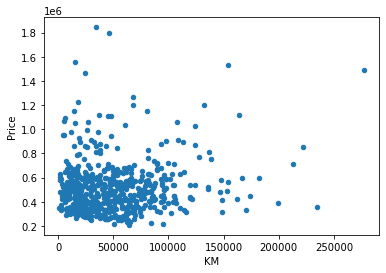

In [328]:
#A high level scatter plot between KM and Price shows that more KMs imply more usage of the car 
# and hence lesse price. However this once again depends upon the specific car models 
# so we will split up the models into different segments
df.plot.scatter(x='KM',y='Price')

<AxesSubplot:xlabel='CarAge', ylabel='Price'>

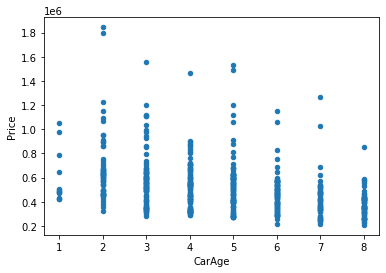

In [330]:
# The greater the age of the car the lesser the price. However this alone is not sufficient
# to determime the price
df.plot.scatter(x='CarAge',y='Price')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbf8134a0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbf8134a790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbf81338d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbf8134ae50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbf813541f0>],
 'means': []}

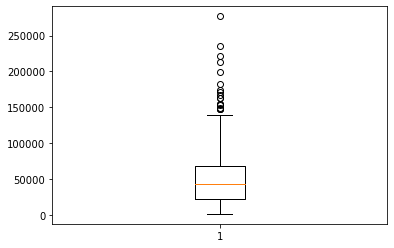

In [331]:
#most of the cars have travelled less than 1.5L km. There are some cars exceeding this number
plt.boxplot(df['KM'])

In [430]:
df1 = df[df['KM'] > 140000]
df1

,Model,Make,Transmission,Engine,Year,KM,Price,Owner,CarAge,Segment
406,MarutiSwiftDzire,ZDI Manual,2,0,2013,199145,390399,1st Owner,8,Sedan
407,ToyotaInnovaCrysta,2.4 ZX 7 STR Manual,2,0,2016,276979,1493499,1st Owner,5,Medium MPV
408,MarutiSwiftDzire,VDI BS IV Manual,2,0,2013,162266,423499,1st Owner,8,Sedan
409,NissanTerrano,XV D THP PREMIUM 110 PS Manual,2,0,2015,153233,491199,1st Owner,6,Mid SUV
412,MarutiSwift,VDI ABS Manual,2,0,2016,146889,480899,1st Owner,5,Hatchback
414,Hyundaii10,MAGNA 1.1 IRDE2 Manual,2,1,2014,148169,316999,1st Owner,7,Mini Hatchback
417,RenaultDuster,85 PS RXE Manual,2,0,2013,173978,450699,3rd Owner,8,Compact SUV
418,HyundaiXcent,S 1.2 Manual,2,1,2015,234911,354199,1st Owner,6,Sedan
420,MahindraXUV500,W10 Manual,2,0,2016,163495,1114199,1st Owner,5,Mid SUV
422,MarutiCelerio,ZXI AMT Automatic,1,1,2016,148728,414799,1st Owner,5,Mini Hatchback


In [431]:
#df1.plot.scatter(x='KM',y='Price')

In [432]:
#df1.plot.scatter(x='CarAge',y='Price')

In [435]:
#dfx1 = df[df['Model'].str.contains('Alto')]
#dfx1

In [434]:
#dfx1.plot.scatter(x='KM',y='Price')

In [339]:
df['Model'].unique()

array(['MarutiAlto', 'MarutiEeco', 'MarutiSwift', 'RenaultKwid',
       'MarutiSwiftDzire', 'MarutiAlto800', 'MarutiWagonR1.0',
       'HyundaiEon', 'TataTiago', 'MarutiAltoK10', 'MarutiOMNIE',
       'MarutiAStar', 'MarutiCelerio', 'MarutiDzire', 'Hyundaii20',
       'HyundaiGrandi10', 'FordEcosport', 'MarutiSPRESSO',
       'HyundaiElitei20', 'FordFigo', 'Hyundaii10', 'HondaBrio',
       'HyundaiNEWSANTRO', 'FordNewFigo', 'HondaJazz', 'HondaAmaze',
       'MarutiBaleno', 'VolkswagenPolo', 'MarutiIGNIS',
       'NissanMicraActive', 'MahindraTUV300', 'HondaCity', 'HondaMobilio',
       'MarutiCiaz', 'RenaultTRIBER', 'Hyundaii20Active', 'JeepCompass',
       'HyundaiVerna', 'FordFigoAspire', 'HondaBR-V', 'NissanMicra',
       'TataNEXON', 'MarutiErtiga', 'MarutiVitaraBrezza',
       'MahindraXUV500', 'VolkswagenVento', 'TataHexa', 'MarutiSCross',
       'HyundaiCreta', 'MahindraXylo', 'MarutiRitz', 'MarutiNewWagon-R',
       'RenaultDuster', 'ToyotaInnovaCrysta', 'NissanTerrano',
      

In [374]:
#Lets split up the models segment wise. We create the below 10 segments for the same
mini_hatchbacks = ['MarutiAlto','MarutiEeco','RenaultKwid','MarutiAlto800','MarutiAStar',
                  'MarutiCelerio','HyundaiGrandi10','Hyundaii10','HondaBrio','NissanMicraActive',
                  'NissanMicra','MarutiAltoK10','HyundaiGRANDI10NIOS','HyundaiEon']
hatchbacks = ['MarutiSwift','Hyundaii20','HyundaiElitei20','HyundaiNEWSANTRO','MarutiBaleno',
             'HondaJazz','FordNewFigo','VolkswagenPolo','MarutiRitz','MarutiWagonRStingray',
             'MarutiNewWagon-R','FiatGrandPunto','MarutiIGNIS','TataTiago','Hyundaii20Active',
             'MarutiOMNIE','MarutiWagonR1.0','FordFigo','MarutiSPRESSO']
sedan = ['HondaAmaze','HondaCity','HyundaiVerna','MarutiSwiftDzire','VolkswagenVento',
        'HyundaiXcent','MarutiCiaz','MarutiDzire','VolkswagenAmeo','FordFigoAspire']
exec_sedan = ['AudiQ3']
mid_sedan = ['SkodaSuperb']
small_mpv = ['HondaWR-V','RenaultTRIBER','HondaMobilio','HondaCRV']
medium_mpv = ['ToyotaInnova','RenaultLodgy','MarutiErtiga','ToyotaInnovaCrysta']
sub_compact_suv = ['TataNEXON','MarutiVitaraBrezza','HyundaiVENUE','MahindraTUV300','FordEcosport']
compact_suv = ['RenaultDuster','HyundaiCreta','HyundaiCreta','JeepCompass','HondaBR-V']
mid_suv = ['MahindraXUV500','MahindraXUV3OO','TataHexa','HyundaiSantaFe','MarutiSCross','NissanTerrano',
          'MahindraXylo','HyundaiTucsonNew']

In [375]:
df['Model'][0]
df['Segment'] = None

In [376]:
#Create a column names Segment and assign the models to their respective segments
for i in range(len(df)):
    if (df['Model'][i] in mini_hatchbacks):
        df['Segment'][i] = 'Mini Hatchback'
    elif(df['Model'][i] in hatchbacks):
        df['Segment'][i] = 'Hatchback'
    elif(df['Model'][i] in sedan):
        df['Segment'][i] = 'Sedan'
    elif(df['Model'][i] in mid_sedan):
        df['Segment'][i] = 'Mid Sedan'
    elif(df['Model'][i] in exec_sedan):
        df['Segment'][i] = 'Executive Sedan'
    elif(df['Model'][i] in small_mpv):
        df['Segment'][i] = 'Small MPV'
    elif(df['Model'][i] in medium_mpv):
        df['Segment'][i] = 'Medium MPV'
    elif(df['Model'][i] in sub_compact_suv):
        df['Segment'][i] = 'Sub-Compact SUV'
    elif(df['Model'][i] in mid_suv):
         df['Segment'][i] = 'Mid SUV'
    elif(df['Model'][i] in compact_suv):
         df['Segment'][i] = 'Compact SUV'
    else:
         df['Segment'][i] = 'None'

<ipython-input-376-f77b73b4b68b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Segment'][i] = 'Mini Hatchback'
<ipython-input-376-f77b73b4b68b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Segment'][i] = 'Hatchback'
<ipython-input-376-f77b73b4b68b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Segment'][i] = 'Sedan'
<ipython-input-376-f77b73b4b68b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [377]:
#Ensure all car models have been assigned to their segments
df[df['Segment'] == 'None']

,Model,Make,Transmission,Engine,Year,KM,Price,Owner,CarAge,Segment


In [378]:
#We notice that most of the cars put up for sale are either hatchbacks or mini hatchbacks
#Followed by sedans, few number in SUV and MPV and just 1 each of mid and executive sedan
df['Segment'].value_counts()

Hatchback          230
Mini Hatchback     192
Sedan               67
Sub-Compact SUV     28
Compact SUV         23
Mid SUV             15
Medium MPV          12
Small MPV            7
Mid Sedan            1
Executive Sedan      1
Name: Segment, dtype: int64

<BarContainer object of 576 artists>

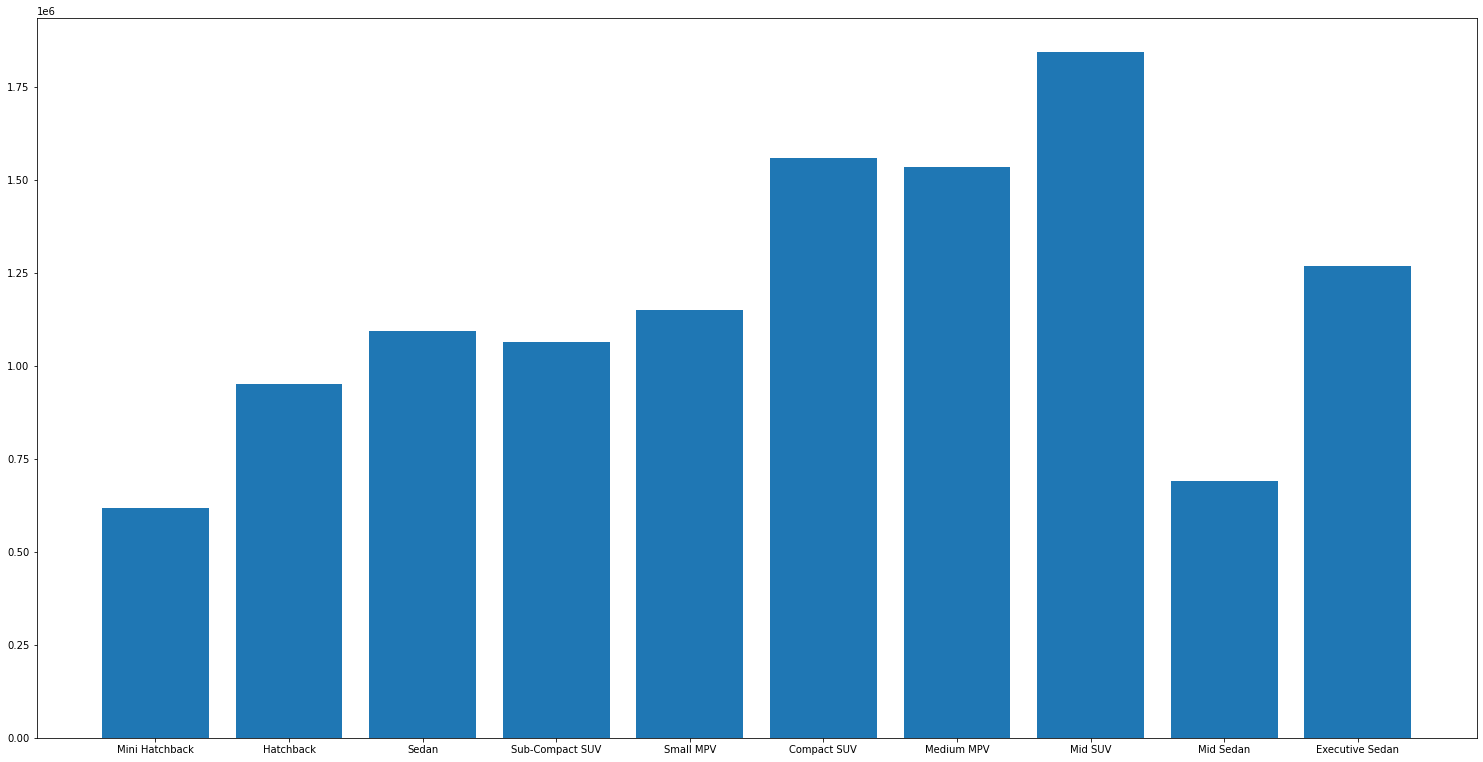

In [394]:
#Lets check the maximum price range for each segment
#As expected hatchback and mini hatchbacks are the lowest, followed by Sedan and small MPV
#Mid SUVs are the highest
fig = plt.figure(1, [20, 10])
ax = fig.add_axes([0,0,1,1])
ax.bar(df['Segment'],df['Price'])


In [392]:
#plt.setp(ax.get_xticklabels(),fontsize=10, rotation='vertical')

<AxesSubplot:xlabel='KM', ylabel='Price'>

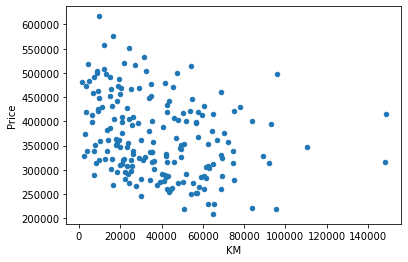

In [395]:
#Lets take the mini hatchbacks and explore. Scatter plot shows that prices drop with increase
# in car usage
dfx = df[df['Segment'] == 'Mini Hatchback']
dfx.plot.scatter(x='KM',y='Price')

<AxesSubplot:xlabel='CarAge', ylabel='Price'>

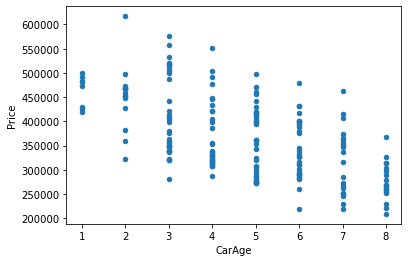

In [397]:
#prices drop with increase in age of the car
dfx = df[df['Segment'] == 'Mini Hatchback']
dfx.plot.scatter(x='CarAge',y='Price')

<BarContainer object of 192 artists>

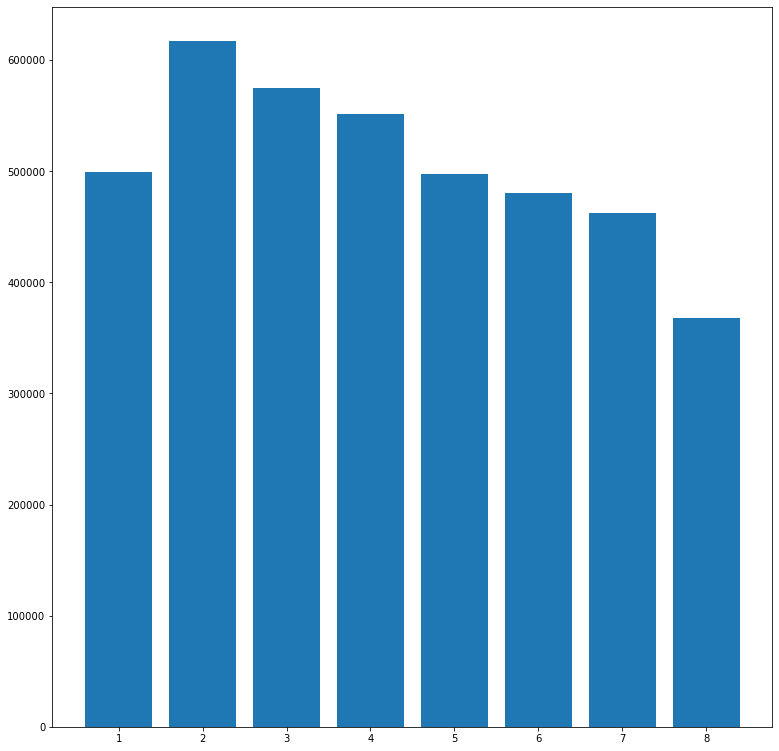

In [400]:
fig = plt.figure(1, [10, 10])
ax = fig.add_axes([0,0,1,1])
ax.bar(dfx['CarAge'],dfx['Price'])

<BarContainer object of 15 artists>

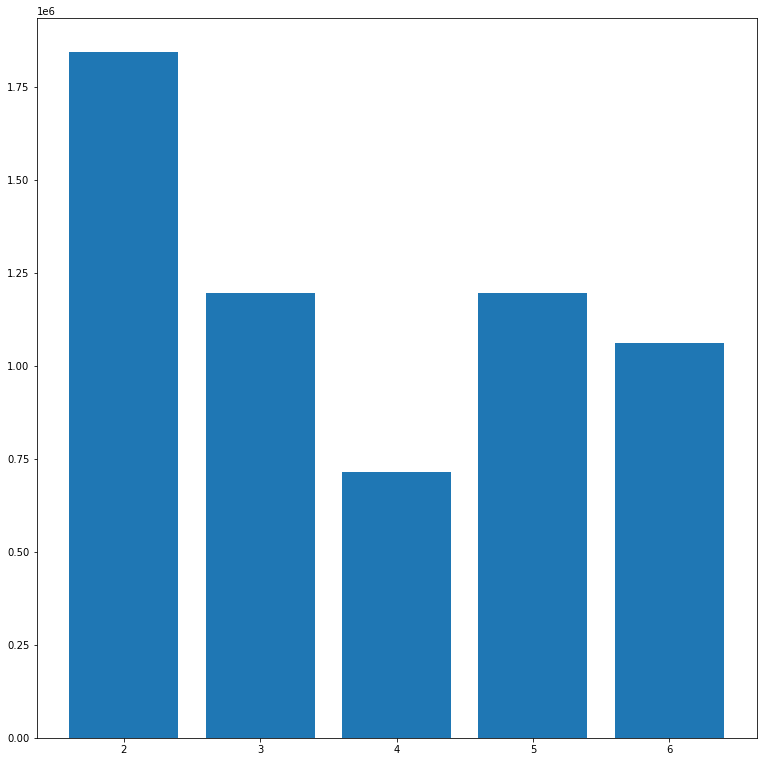

In [401]:
#Price based on age of car in Mid-SUV segment. As in other cases, prices depreciate with age
#
dfy = df[df['Segment'] == 'Mid SUV']
fig = plt.figure(1, [10, 10])
ax = fig.add_axes([0,0,1,1])
ax.bar(dfy['CarAge'],dfy['Price'])

In [402]:
#Lets encode the  engine (petrol,diesel) and transmission (automatic,manual) values for the cars 
#and see if they have any impact on the price
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df['Engine'] = labelencoder.fit_transform(df['Engine']) #fitting and transforming the desired categorical column.

In [403]:
df.head()

,Model,Make,Transmission,Engine,Year,KM,Price,Owner,CarAge,Segment
0,MarutiAlto,LXI Manual,Manual,1,2020,3494,419599,1st Owner,1,Mini Hatchback
1,MarutiEeco,5 STR WITH AC PLUSHTR Manual,Manual,1,2014,18371,354499,1st Owner,7,Mini Hatchback
2,MarutiSwift,LXI Manual,Manual,1,2019,2484,586699,1st Owner,2,Hatchback
3,RenaultKwid,1.0 RXT Opt AT Automatic,Automatic,1,2020,4824,483299,1st Owner,1,Mini Hatchback
4,MarutiSwiftDzire,VXI 1.2 BS IV Manual,Manual,1,2014,10131,492099,1st Owner,7,Sedan


In [404]:
df['Transmission'] = labelencoder.fit_transform(df['Transmission']) #fitting and transforming the desired categorical column.

In [405]:
df.head()

,Model,Make,Transmission,Engine,Year,KM,Price,Owner,CarAge,Segment
0,MarutiAlto,LXI Manual,2,1,2020,3494,419599,1st Owner,1,Mini Hatchback
1,MarutiEeco,5 STR WITH AC PLUSHTR Manual,2,1,2014,18371,354499,1st Owner,7,Mini Hatchback
2,MarutiSwift,LXI Manual,2,1,2019,2484,586699,1st Owner,2,Hatchback
3,RenaultKwid,1.0 RXT Opt AT Automatic,1,1,2020,4824,483299,1st Owner,1,Mini Hatchback
4,MarutiSwiftDzire,VXI 1.2 BS IV Manual,2,1,2014,10131,492099,1st Owner,7,Sedan


In [406]:
dfx = df[df['Segment'] == 'Mini Hatchback']

<BarContainer object of 192 artists>

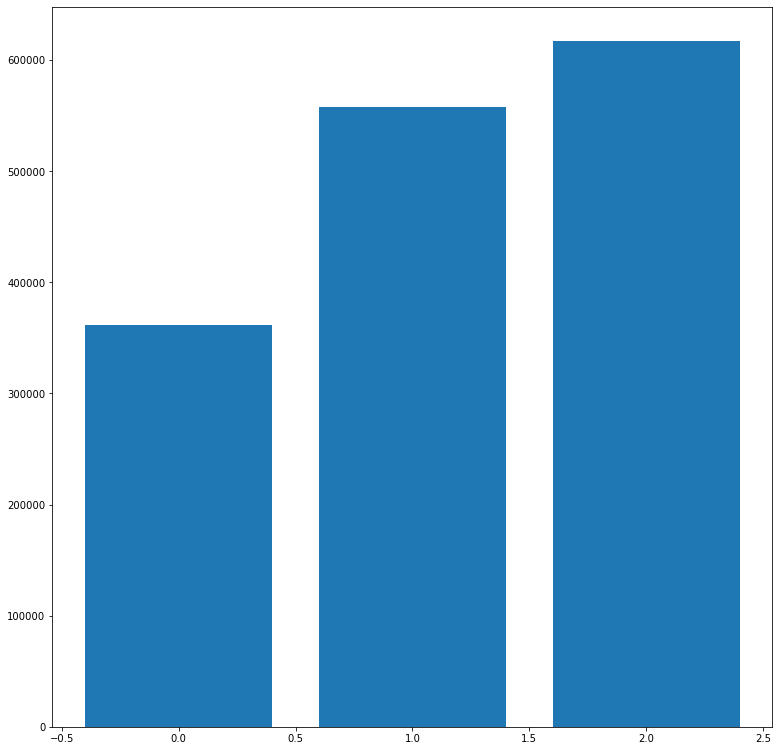

In [407]:
#From the below chart, it seems the automatic transmission cars are less priced than their manual
#counterparts. Lets see how many automatic cars are present in this segment
fig = plt.figure(1, [10, 10])
ax = fig.add_axes([0,0,1,1])
ax.bar(dfx['Transmission'],dfx['Price'])

(array([  4.,   0.,   0.,   0.,   0.,  24.,   0.,   0.,   0., 164.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

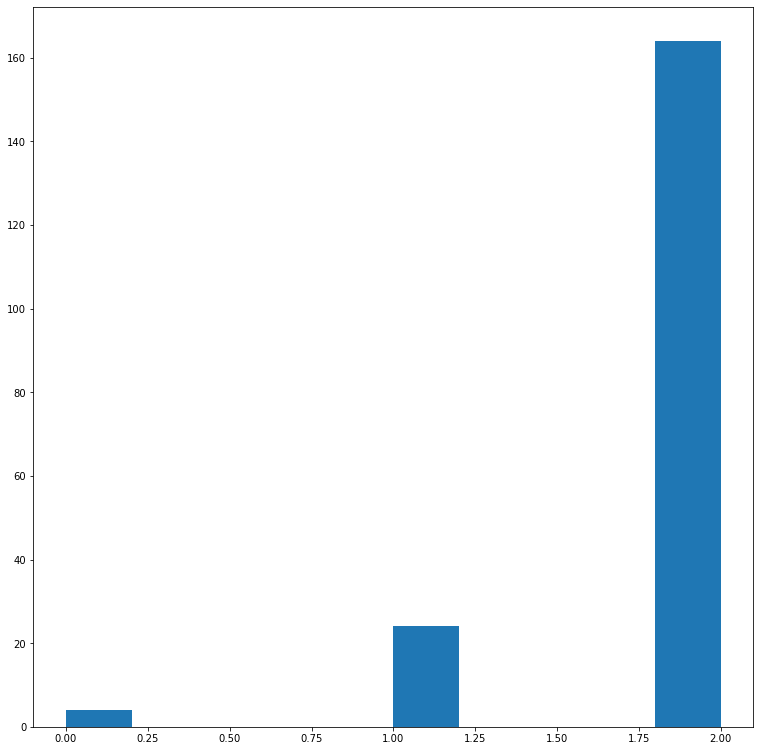

In [408]:
fig = plt.figure(1, [10, 10])
ax = fig.add_axes([0,0,1,1])
ax.hist(dfx['Transmission'])
#automatic cars are very few in number. Therefore we cannot use this to derive insights

(array([  0.,   0.,   0.,   0.,   0., 192.,   0.,   0.,   0.,   0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

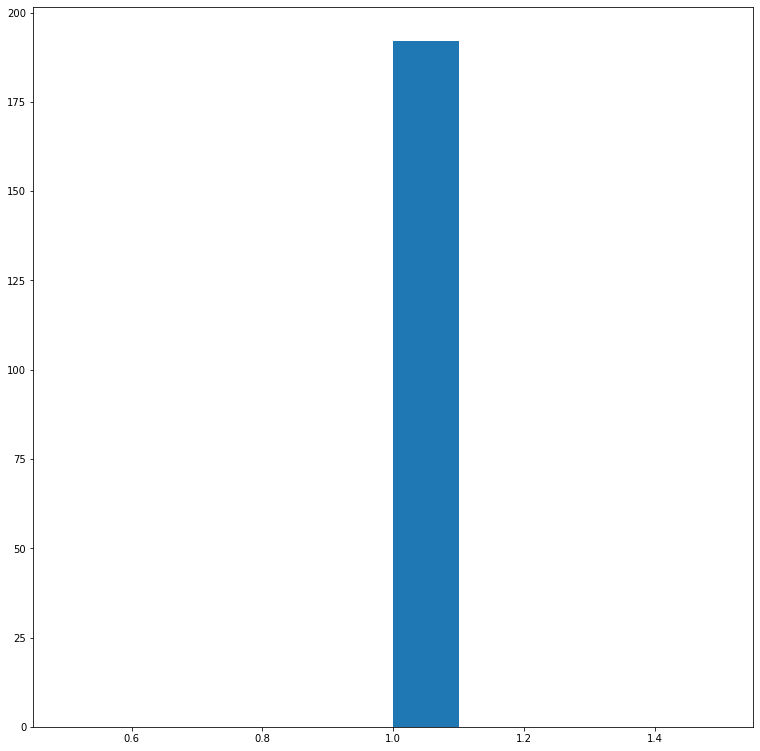

In [410]:
fig = plt.figure(1, [10, 10])
ax = fig.add_axes([0,0,1,1])
ax.hist(dfx['Engine'])
#Petrol cars are more in number than diesel cars in the mini hatchback segment

<BarContainer object of 15 artists>

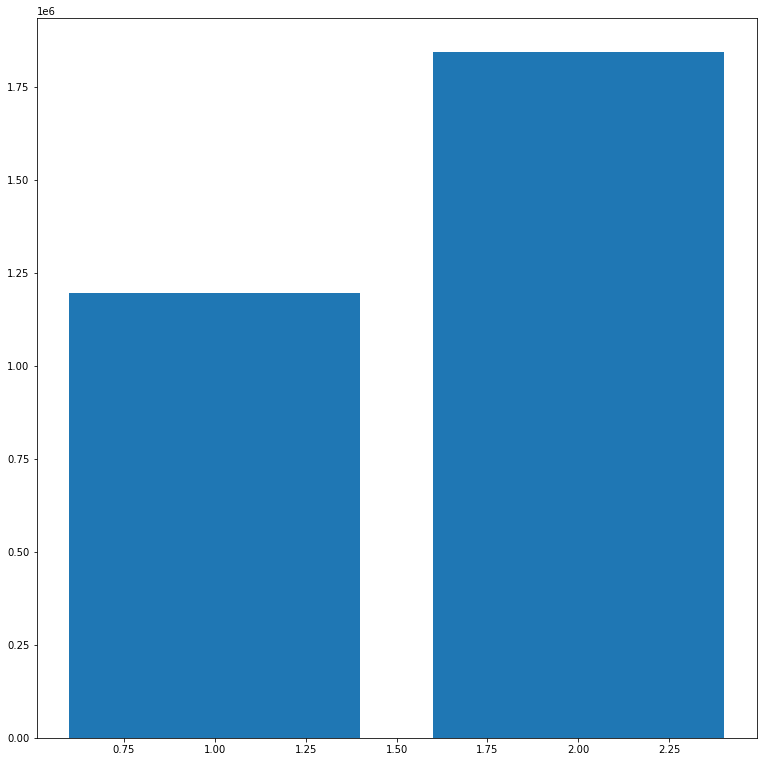

In [413]:
dfy = df[df['Segment'] == 'Mid SUV']
fig = plt.figure(1, [10, 10])
ax = fig.add_axes([0,0,1,1])
ax.bar(dfy['Transmission'],dfy['Price'])

(array([ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

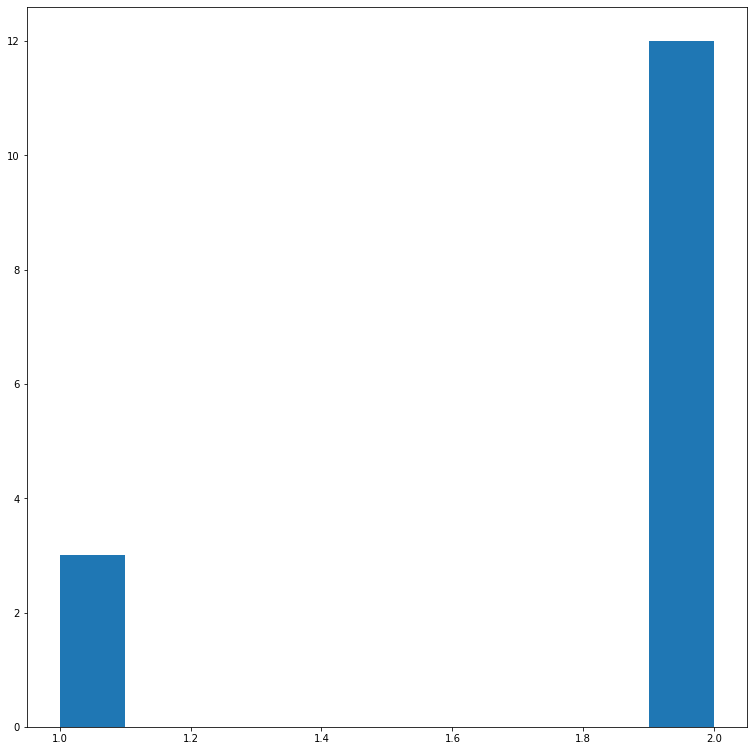

In [414]:
#Automatic cars are fewer in number in the mid suv segment too
fig = plt.figure(1, [10, 10])
ax = fig.add_axes([0,0,1,1])
ax.hist(dfy['Transmission'])

(array([ 0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

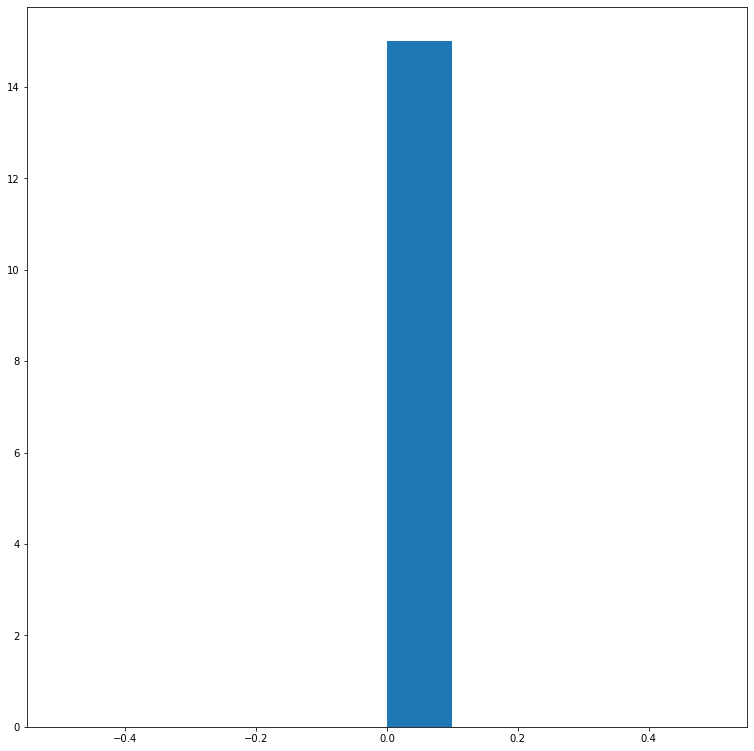

In [415]:
fig = plt.figure(1, [10, 10])
ax = fig.add_axes([0,0,1,1])
ax.hist(dfy['Engine'])

(array([23.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 44.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

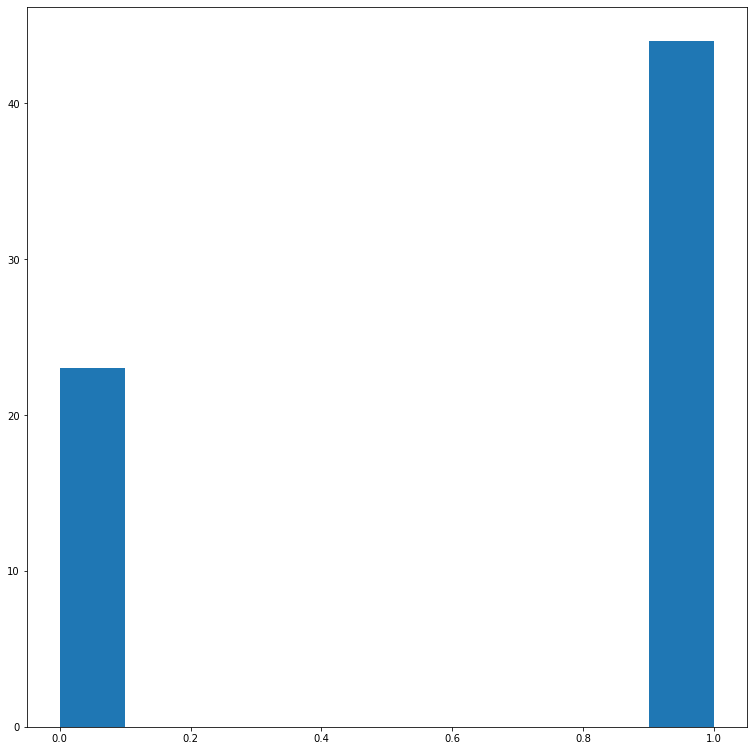

In [416]:
dfz = df[df['Segment'] == 'Sedan']
fig = plt.figure(1, [10, 10])
ax = fig.add_axes([0,0,1,1])
ax.hist(dfz['Engine'])

(array([ 3.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0., 56.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

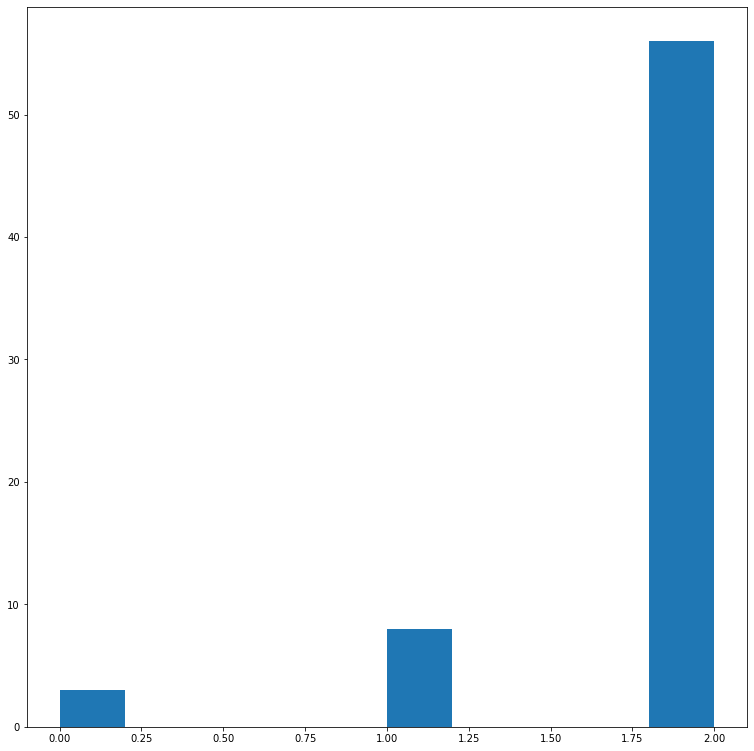

In [417]:
fig = plt.figure(1, [10, 10])
ax = fig.add_axes([0,0,1,1])
ax.hist(dfz['Transmission'])

<BarContainer object of 67 artists>

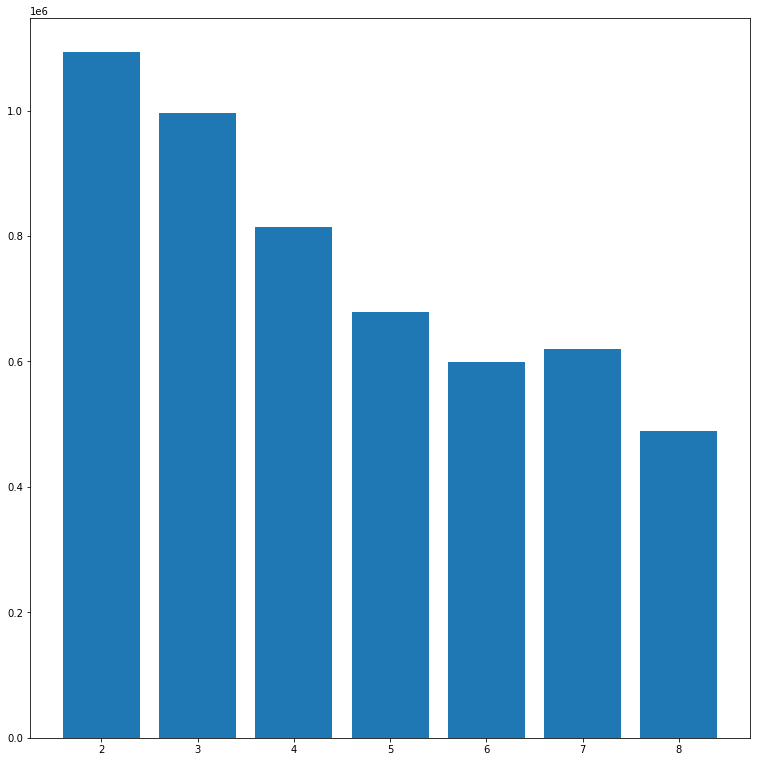

In [419]:
fig = plt.figure(1, [10, 10])
ax = fig.add_axes([0,0,1,1])
ax.bar(dfz['CarAge'],dfz['Price'])

<AxesSubplot:xlabel='KM', ylabel='Price'>

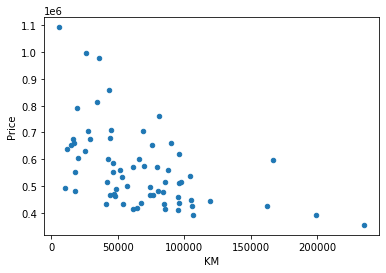

In [420]:
dfz.plot.scatter(x='KM',y='Price')

In [421]:
dfw = df[df['Segment'] == 'Hatchback']

<BarContainer object of 230 artists>

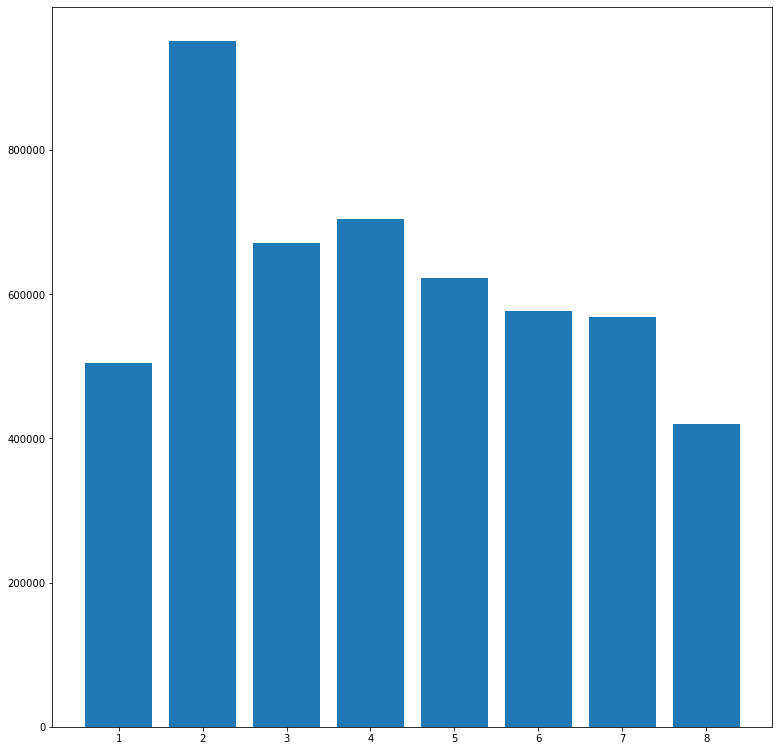

In [423]:
fig = plt.figure(1, [10, 10])
ax = fig.add_axes([0,0,1,1])
ax.bar(dfw['CarAge'],dfw['Price'])

(array([ 12.,   0.,   0.,   0.,   0.,  18.,   0.,   0.,   0., 200.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

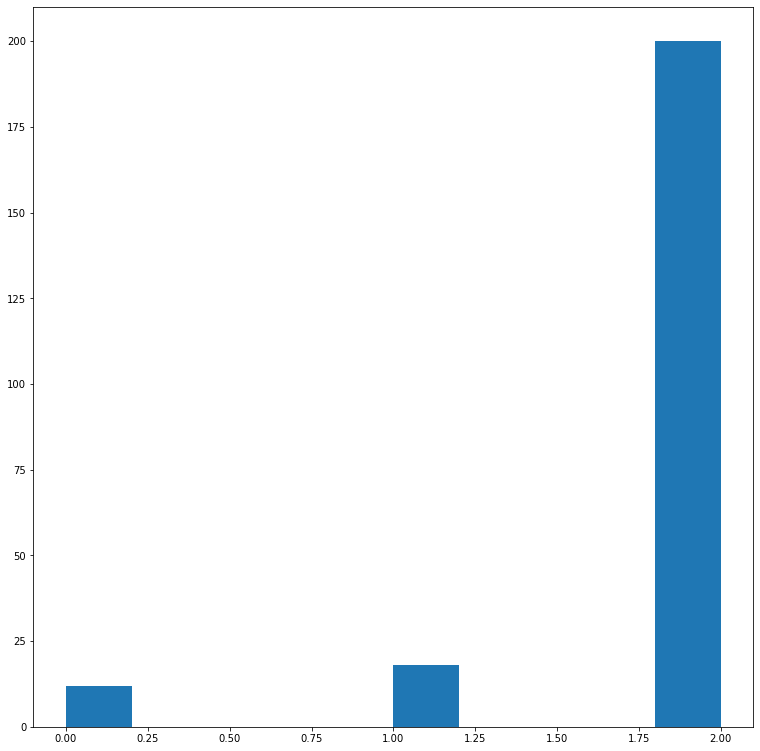

In [424]:
fig = plt.figure(1, [10, 10])
ax = fig.add_axes([0,0,1,1])
ax.hist(dfw['Transmission'])

(array([ 36.,   0.,   0.,   0.,   0., 193.,   0.,   0.,   0.,   1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

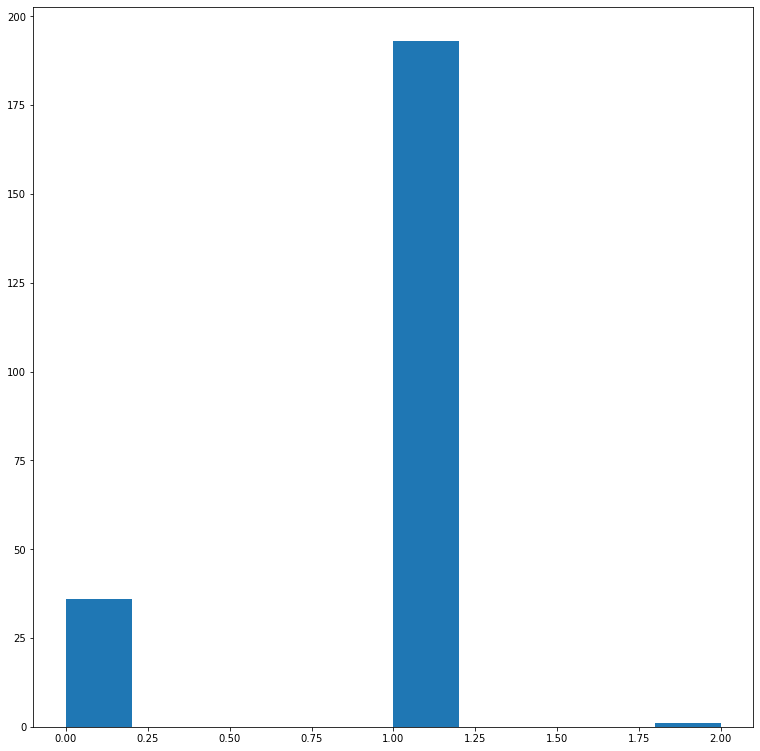

In [425]:
fig = plt.figure(1, [10, 10])
ax = fig.add_axes([0,0,1,1])
ax.hist(dfw['Engine'])

<AxesSubplot:xlabel='KM', ylabel='Price'>

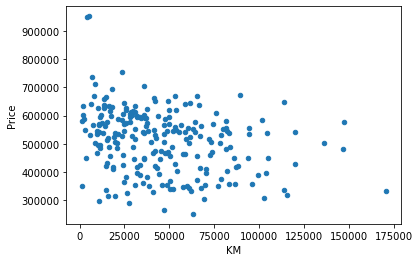

In [427]:
dfw.plot.scatter(x='KM',y='Price')